### Neshyba 2023


# LMOs


### 


<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/DMOs and LMOs.jpg" height="1000" width="1000"/>
<p style='text-align: center;'>
<strong>Figure 1</strong>. LMOs and DMOs. From https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Quantum_Tutorials_(Rioux)/03%3A_Chemical_Bonding/3.15%3A_Localized_and_Delocalized_Molecular_Orbitals.
</p>


The idea here is:

Wikipedia pages https://en.wikipedia.org/wiki/Valence_bond_theory and https://en.wikipedia.org/wiki/Localized_molecular_orbitals talk about the equivalence of LMOs and DMOs

We can still learn from them, however, because they treat time a little differently.

The localized superposition states are given by

$$
\psi_A(x) = \psi_1(x) + \psi_2(x) \ \ \ \ (1)
$$

$$
\psi_B(x) = \psi_1(x) - \psi_2(x) \ \ \ \ (2)
$$

We have $\psi_1(x)$ and $\psi_2(x)$ DMOs from an earlier assignment pertaining to $CO_2$, so we'll be able to confirm that this superposition really does produce localized orbitals.

Localized orbitals evolve, however, according to

$$
\psi_A(x,t) = \psi_1(x) + exp\big(-{i\Delta Et \over \hbar}\big)\psi_2(x) \ \ \ \ (3)
$$

$$
\psi_B(x,t) = \psi_1(x) - exp\big(-{i\Delta Et \over \hbar}\big)\psi_2(x) \ \ \ \ (4)
$$

The complex exponential works the same way as sin and cosine functions, namely, when its argumentequals $2 \pi$, we have a recurrence. That is, if we solve

$$
{\Delta Et \over \hbar} = 2 \pi
$$

for time (call the result $\tau_{recurrence}$), then that's the time required for a recurrence. In other words, after a time ${\tau_{recurrence} \over 2}$ has passed, $\psi_A$ will look like $\psi_B$, and $\psi_B$ will look like $\psi_A$! And after a time $\tau_{recurrence}$ has passed, both localized states will return to their original form. 

In this CGI, you'll be getting Delta E from the energy difference between the two DMOs, according to Spartan. For $CO_2$, these are the energies of HOMO-7 and HOMO-6.

It's hard sometimes to evaluate the meaning of numbers as small as $\tau_{recurrence}$ (remember, this is an atomic time unit). But it is useful to compare it to something that very much depends on those bonds, namely the time required for a single vibration to complete. We can get that from $\tilde \nu$ we get from an IR spectrum,

$$
\tau_{vib} = {1 \over \nu} = {1 \over c \tilde \nu} \ \ \ \ (5)
$$



In [45]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry(system='atomic').Quantity
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
import PchemLibrary as PL
import plotly.graph_objects as go
%matplotlib notebook

In [46]:
# Quantum constants
hbar = AssignQuantity(1,'atomic_unit_of_time * hartree'); print(hbar)
h = hbar*2*np.pi; print(h)
c = AssignQuantity(137,'bohr/atomic_unit_of_time')

1 atomic_unit_of_time * hartree
6.283185307179586 atomic_unit_of_time * hartree


In [52]:
### Loading in, forming, and graphing the superpositions of the DMOs we got before

In [47]:
# Figuring out the recurence time for these LMOs
E_HOMO_M6 = AssignQuantity(-33.3,'eV')
E_HOMO_M7 = AssignQuantity(-34.5,'eV')
DeltaE = E_HOMO_M6-E_HOMO_M7
DeltaE.ito('hartree')
tau_recurrence = h/DeltaE
print(tau_recurrence)

142.47848520731918 atomic_unit_of_time


<IPython.core.display.Javascript object>


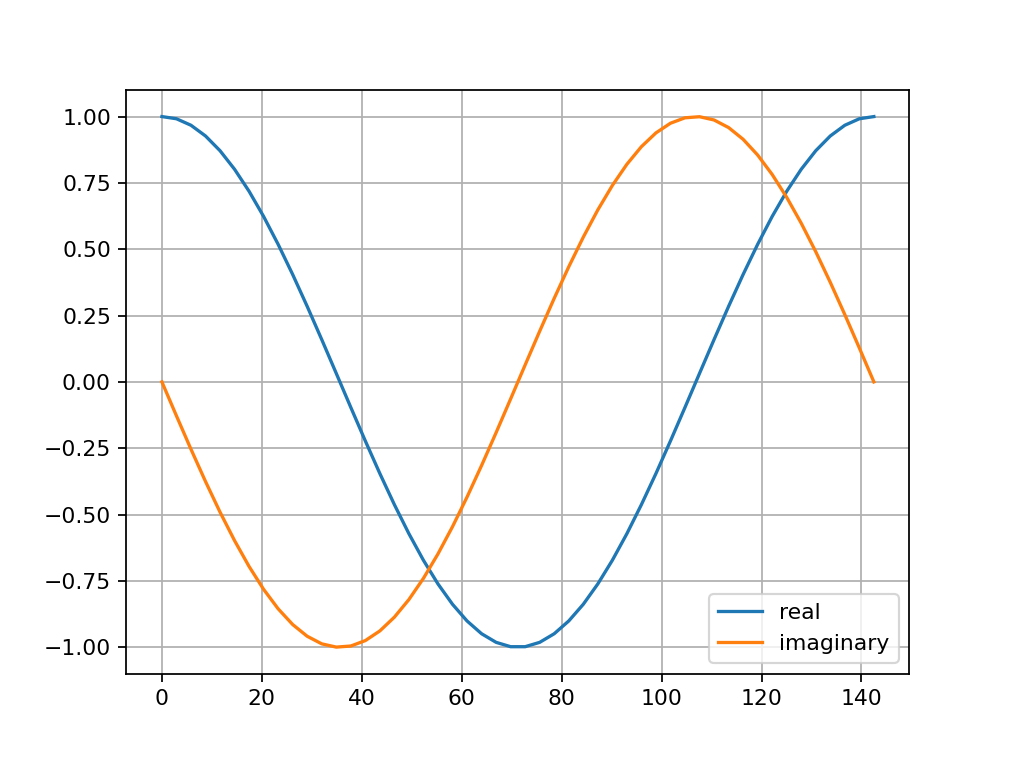

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [48]:
# Plotting the exponential factor over one recurrence cycle
time = np.linspace(0,tau_recurrence)
expfactor = np.exp(-1j * DeltaE*time/hbar)
plt.plot(time,expfactor.real,label='real')
plt.plot(time,expfactor.imag,label='imaginary')
plt.legend()
plt.grid(True)

### Pause for analysis
Interpret that graph ... When does the second term in Eq. 4 become -1? When does it return to zero?

### BEGIN SOLUTION
### END SOLUTION

In [49]:
# Figuring out the vibrational time
nutilde = AssignQuantity(2335,'1/cm')
tau_vib = 1/(nutilde*c)
tau_vib.ito('atomic_unit_of_time')
print(tau_vib)

590.733248291558 atomic_unit_of_time


### Pause for analysis
So, in the course of a single vibration, how many times has the LMO switched from A to B?

### BEGIN SOLUTION
About four times
### END SOLUTION

### Your turn
The question now is, how generic is the answer you just got? In the cell below, calculate $\tau_{recurrence}$ and $\tau_{vib}$ for some other molecule -- say, $SO_2$ (but it's really your choice). Then in the following cell, comment on whether the pattern is similar to, of different from, what we just saw for $CO2$.

Note that part of what you'll need to pay attention to in finding $\tau_{recurrence}$ is which DMOs correspond to $\psi_1$ and $\psi_2$ (probably not going to be the 6th and 7th, as it was for $CO_2$).

In [50]:
### BEGIN SOLUTION
# Figuring out the recurence time for these LMOs
E_HOMO_M7 = AssignQuantity(-31.4,'eV')
E_HOMO_M8 = AssignQuantity(-34,'eV')
DeltaE = E_HOMO_M7-E_HOMO_M8
DeltaE.ito('hartree')
tau_recurrence = h/DeltaE
print(tau_recurrence)

# Figuring out the vibrational time
nutilde = AssignQuantity(1335,'1/cm')
tau_vib = 1/(nutilde*c)
tau_vib.ito('atomic_unit_of_time')
print(tau_vib)

ratio = tau_vib/tau_recurrence; print(ratio)
### END SOLUTION

65.75930086491667 atomic_unit_of_time
1033.230063491227 atomic_unit_of_time
15.712303049171663 dimensionless


### BEGIN SOLUTION
Now it's about 15 times (for $SO_2$)
### END SOLUTION

### Refreshing and saving your code
1. Use the dropdown menu Kernel/Restart
2. Use the dropdown menu Cell/Run All Above
3. Under the "File" dropdown menu item in the upper left is a disk icon. Press it now to save your work (you can, do this at any time as you're working on an assignment, actually).

### Validating
This step will help ensure that you didn't miss something (although it's not a guarantee). Find the "Validate" button and press it. If there are any errors or warnings, fix them.

### Finishing up
Assuming all this has gone smoothly, carry out three more steps (but read this carefully before starting):
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page